<a href="https://colab.research.google.com/github/adityamishra5050/Mobile-Price-Classification/blob/main/MLB_Assignment_1_M20MA201_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the Dataset from Kaggle link which is given in the Assignment 1 as " https://www.kaggle.com/iabhishekofficial/mobile-price-classification " , with the help of this link we will upload the dataset in the colab  and will do the furthur work.

In [ ]:
from google.colab import files
Files=files.upload()

Saving train.csv to train (1).csv


In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
Data = pd.read_csv('train.csv')

In [ ]:
Data.shape

(2000, 21)

In [ ]:
Data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
Data['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
Data = Data.dropna()
Data.shape

(2000, 21)

In [ ]:
data = Data.drop_duplicates()
data.shape

(2000, 21)

In [ ]:
for i in data:
    print(i,":",len(data[i].unique()))

battery_power : 1094
blue : 2
clock_speed : 26
dual_sim : 2
fc : 20
four_g : 2
int_memory : 63
m_dep : 10
mobile_wt : 121
n_cores : 8
pc : 21
px_height : 1137
px_width : 1109
ram : 1562
sc_h : 15
sc_w : 19
talk_time : 19
three_g : 2
touch_screen : 2
wifi : 2
price_range : 4


Outliers Removal

In [ ]:
data.mean()

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

In [ ]:
import numpy as np

In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data_num = data[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = data[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [ ]:
import matplotlib.pyplot as plt


Numerical Data Exploration

<ipython-input-42-150d59a4376e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


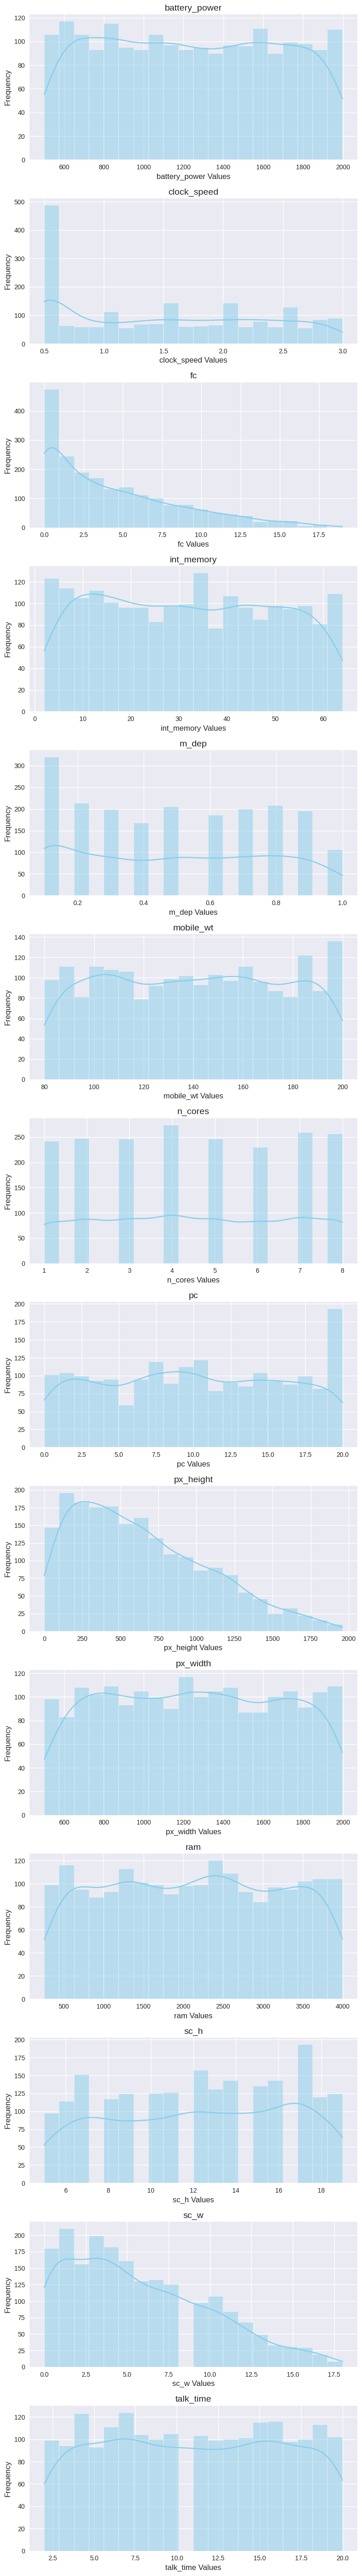

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_num is your DataFrame with numerical data

plt.style.use('seaborn')
plt.figure(figsize=(8, 4 * len(data_num.columns)))

for i, column in enumerate(data_num.columns):
    plt.subplot(len(data_num.columns), 1, i + 1)
    sns.histplot(data_num[column], kde=True, color='skyblue', bins=20)
    plt.title(column, fontsize=14)
    plt.xlabel(f'{column} Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

In [ ]:
corr = data.corr()

np.fill_diagonal(corr.values, 0)

corr.replace(0, np.nan, inplace=True)
plt.show()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,NaN,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,NaN,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,NaN,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,NaN,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,NaN,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,NaN,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,NaN,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,NaN,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,NaN,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,NaN,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

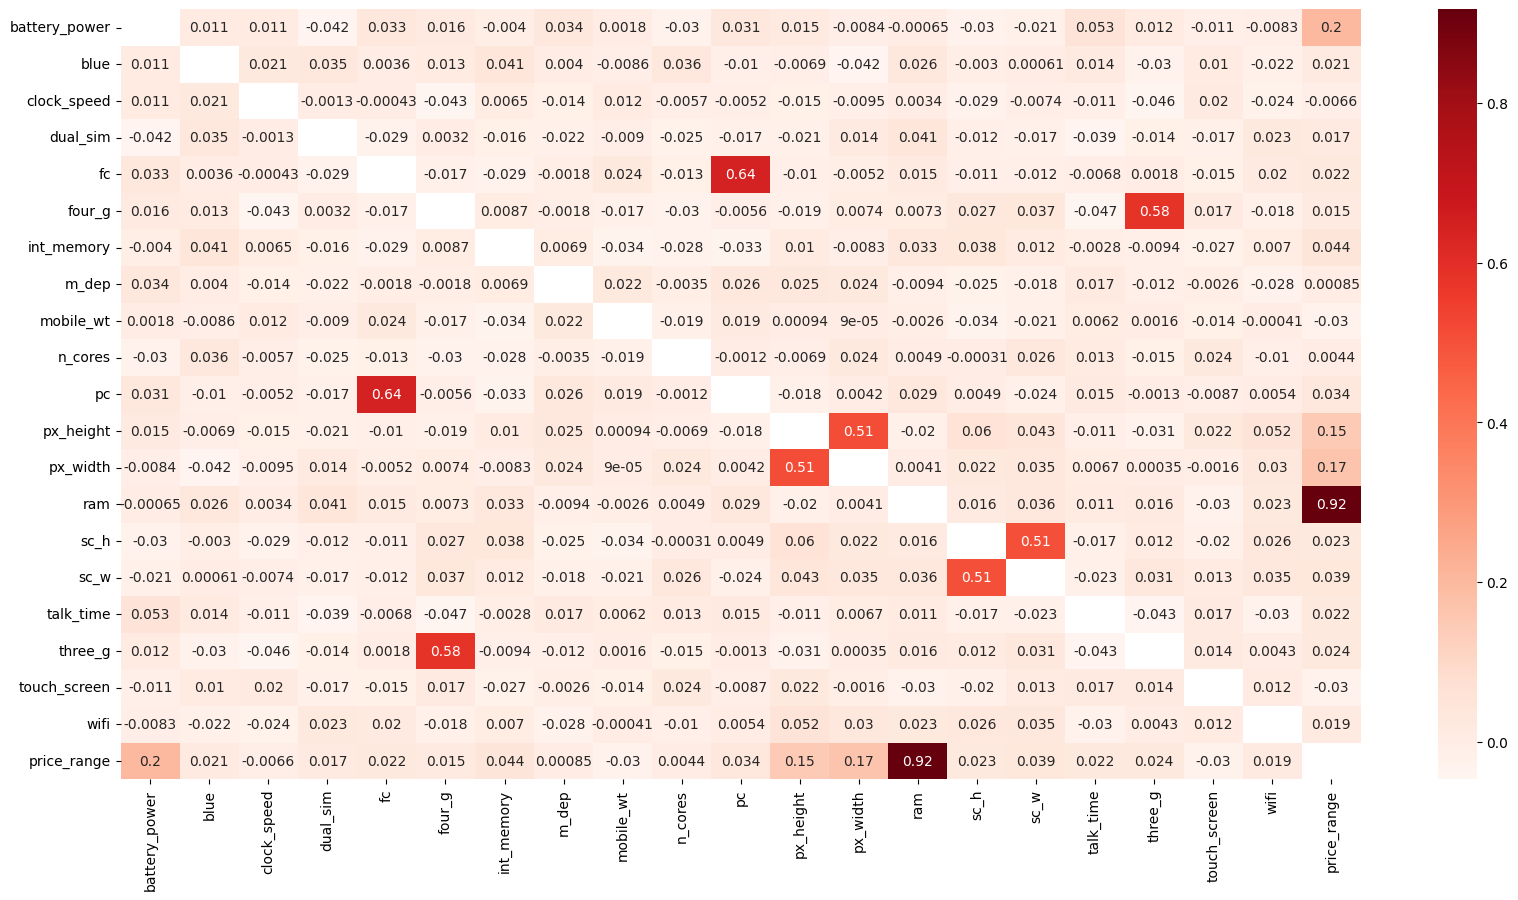

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Reds')

Display highest correlations between all of our variables

In [ ]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='last')

price_range  price_range         NaN
talk_time    four_g        -0.046628
three_g      clock_speed   -0.046433
clock_speed  four_g        -0.043073
talk_time    three_g       -0.042688
                              ...   
sc_w         sc_h           0.506144
px_width     px_height      0.510664
three_g      four_g         0.584246
pc           fc             0.644595
price_range  ram            0.917046
Length: 211, dtype: float64

Display highest correlations between price_range and the other features in our dataset

In [ ]:
corr.abs()['price_range'].sort_values(ascending=False)

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
price_range           NaN
Name: price_range, dtype: float64

The highest correlations to our target variable (price_range) are:

1) ram

2) battery_power

3) px_width

4) px_height

Key Variables Visualizations

<Figure size 1000x600 with 0 Axes>

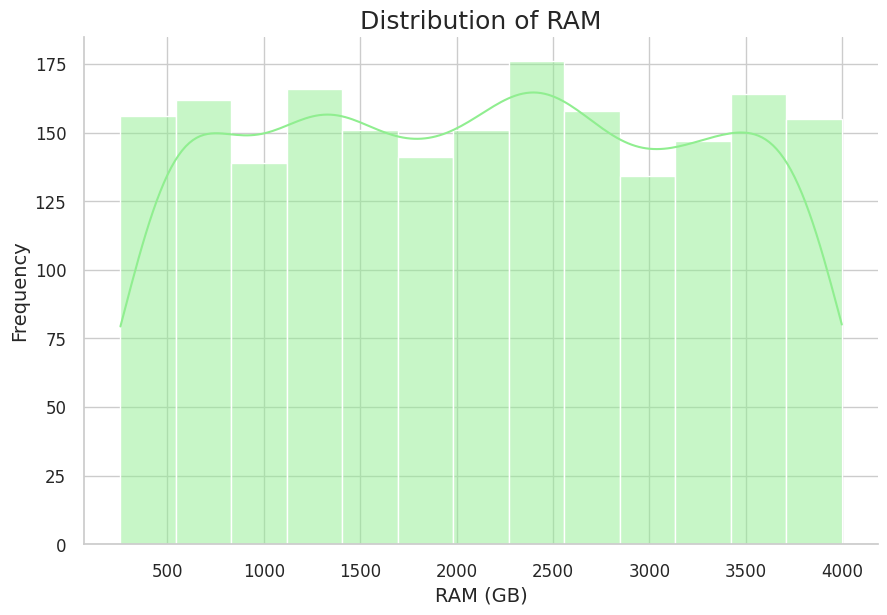

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'ram' is a column in it

# Set a stylish color palette
sns.set_palette("pastel")

# Create a figure with custom size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the displot
sns.displot(data, x='ram', color='lightgreen', kde=True, aspect=1.5, height=6)

# Add a title
plt.title("Distribution of RAM", fontsize=18)

# Customize axis labels
plt.xlabel("RAM (GB)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


<ipython-input-49-37ed3a493af8>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1000x600 with 0 Axes>

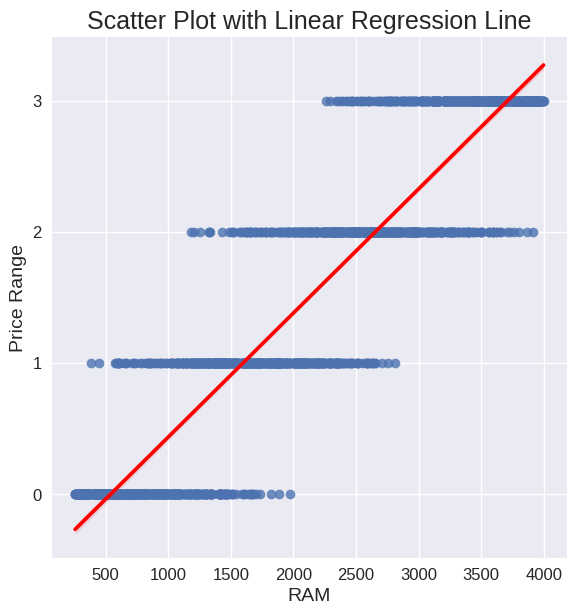

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish color palette
sns.set_palette("viridis")

# Create a figure with custom size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Create the lmplot with a regression line
lm = sns.lmplot(x='ram', y='price_range', data=data, line_kws={'color': 'red'}, height=6)

# Customize the axis labels
plt.xlabel('RAM', fontsize=14)
plt.ylabel('Price Range', fontsize=14)

# Customize tick label font size
plt.xticks(fontsize=12)
plt.yticks([0, 1, 2, 3], fontsize=12)

# Add a title
plt.title('Scatter Plot with Linear Regression Line', fontsize=18)



plt.show()


The plot aboves shows the high correlation between ram and price range. It shows the general pattern: as ram increases, mobile's price increases

<ipython-input-56-95dabaf51cd1>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


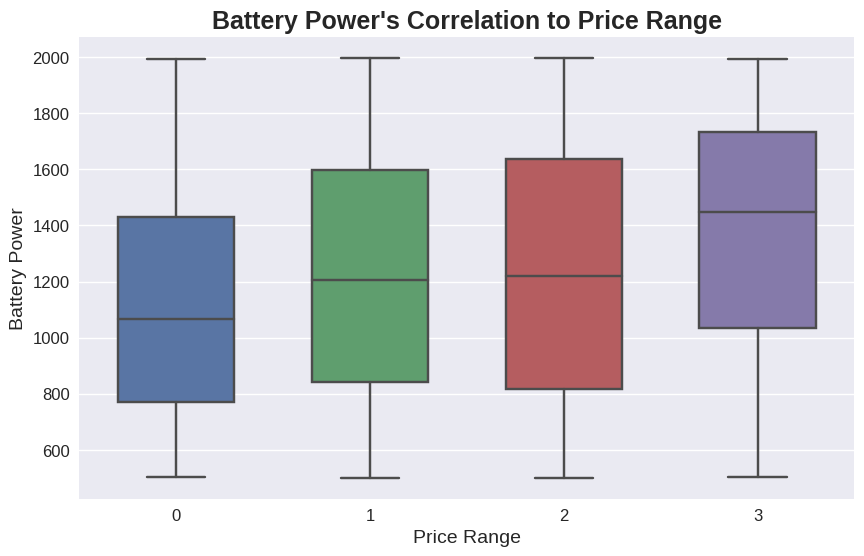

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a stylish color palette
sns.set_palette("coolwarm")

# Create a figure with custom size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')

# Create the boxplot with the "coolwarm" palette
sns.boxplot(x='price_range', y='battery_power', data=data, width=0.6)

# Customize the axis labels
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Battery Power', fontsize=14)

# Customize tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a title
plt.title("Battery Power's Correlation to Price Range", fontsize=18, weight='bold')

plt.show()


<ipython-input-57-426e1a586e46>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


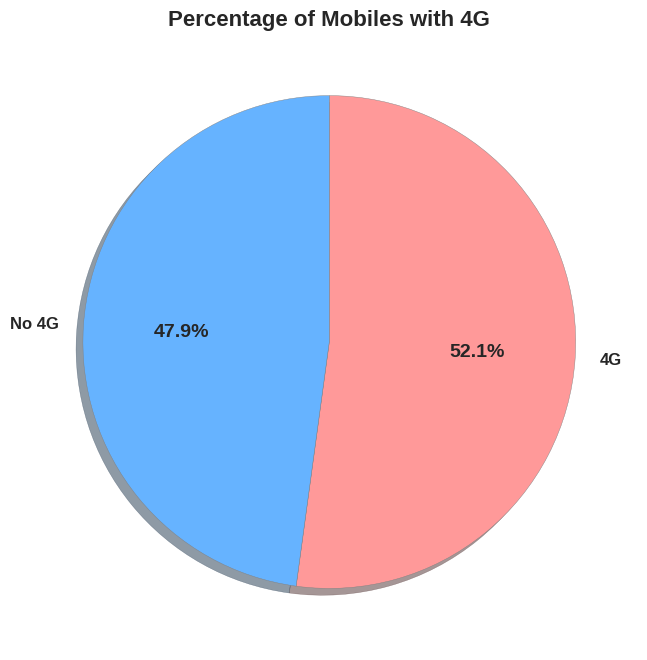

In [ ]:
import matplotlib.pyplot as plt

# Extract the data and labels
four_g = data['four_g'].value_counts()
labels_4g = ['4G', 'No 4G']

# Set a stylish color palette
colors = ['#ff9999', '#66b3ff']

# Create a figure with a custom style and size
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('seaborn-pastel')

# Plot the pie chart
wedges, texts, autotexts = ax.pie(four_g, labels=labels_4g, autopct="%.1f%%", colors=colors,
                                  shadow=True, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'gray'})

# Customize text appearance
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Percentage of Mobiles with 4G', fontsize=16, weight='bold')

plt.show()


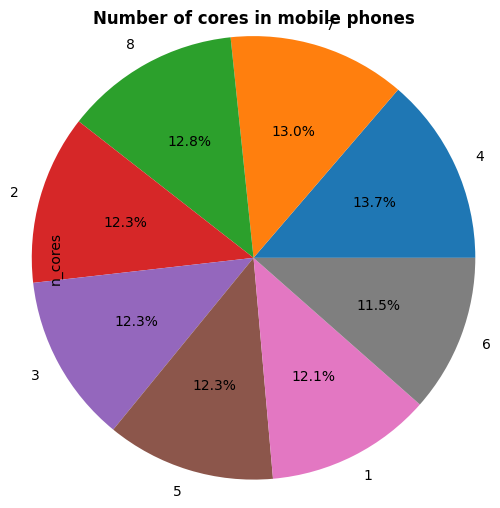

In [ ]:
n_cores = data['n_cores'].value_counts()
plt.title('Number of cores in mobile phones\n\n', weight='bold')
n_cores.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

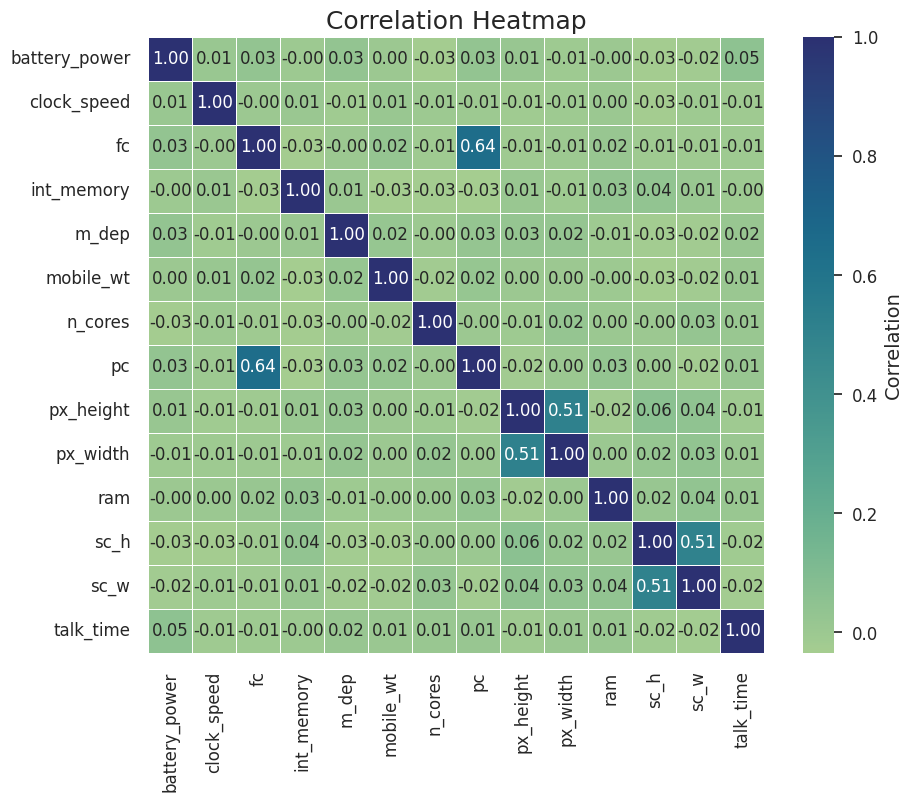

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with custom size and style
plt.figure(figsize=(10, 8))
sns.set(style="white")

# Create the heatmap with the "crest" colormap
heatmap = sns.heatmap(data_num.corr(), cmap="crest", annot=True, fmt=".2f", linewidths=0.5, square=True)

# Customize the color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Add a title
plt.title("Correlation Heatmap", fontsize=18)

# Customize tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


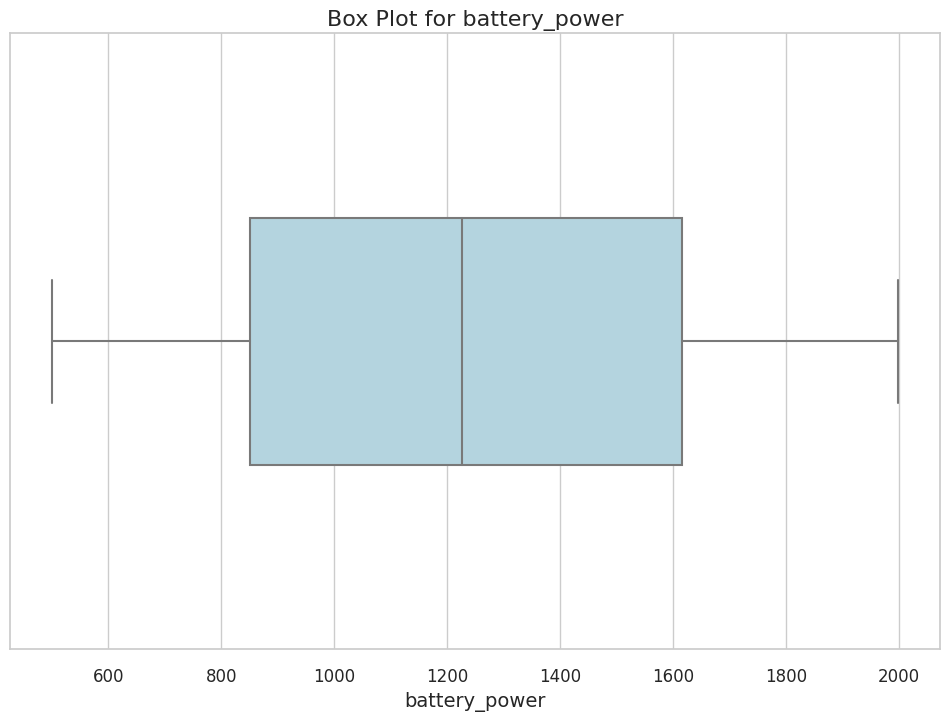

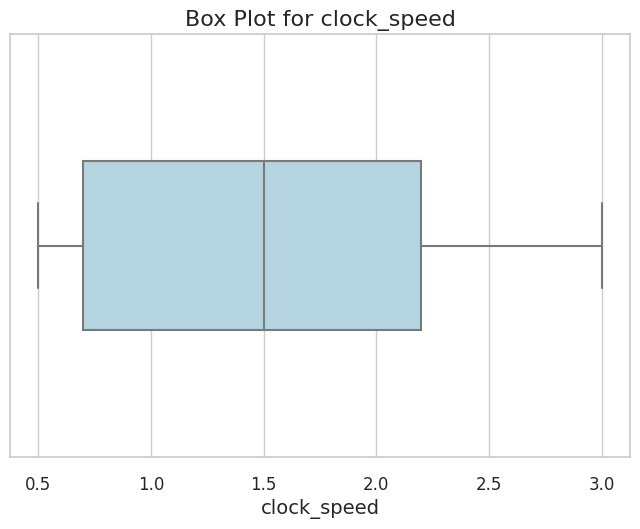

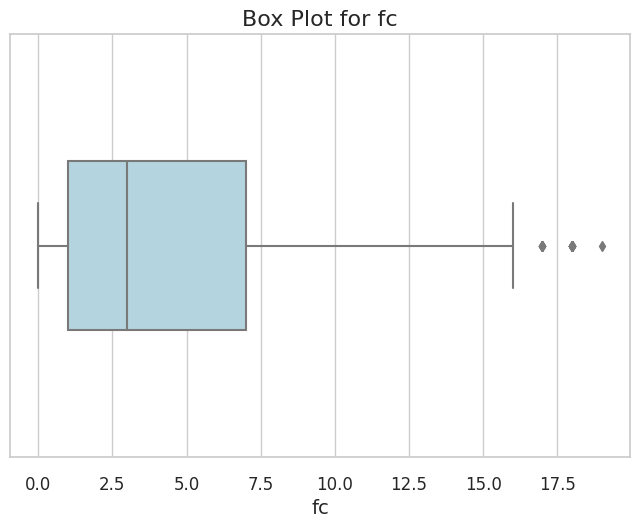

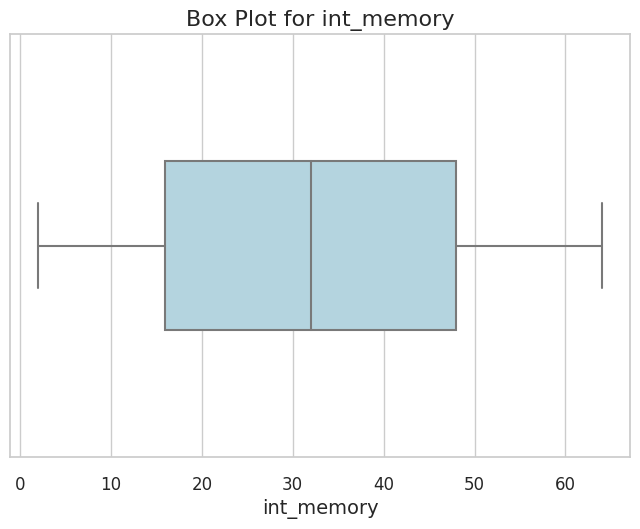

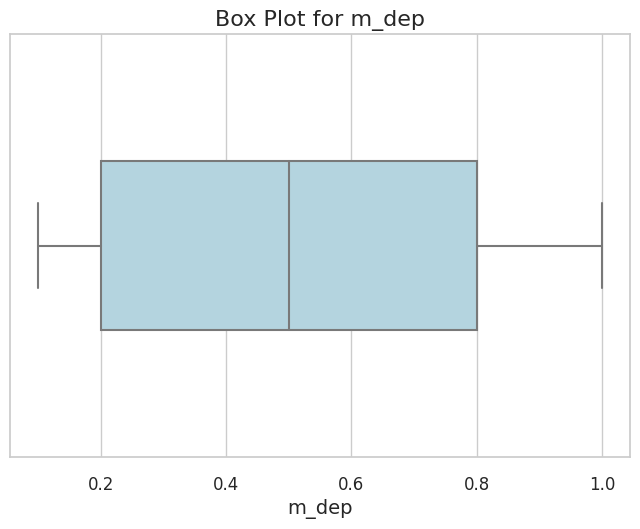

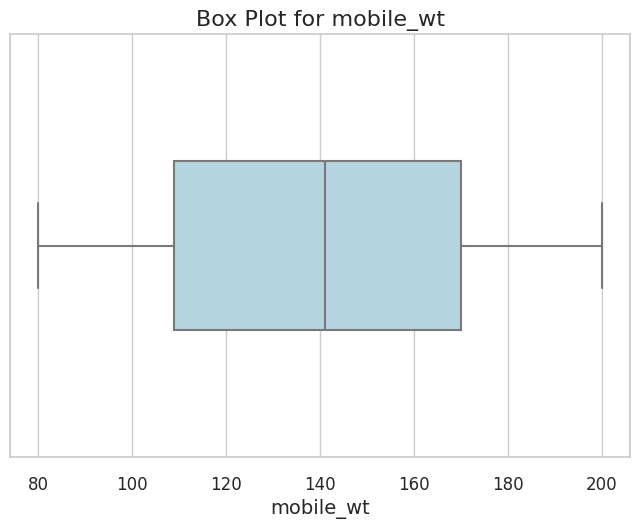

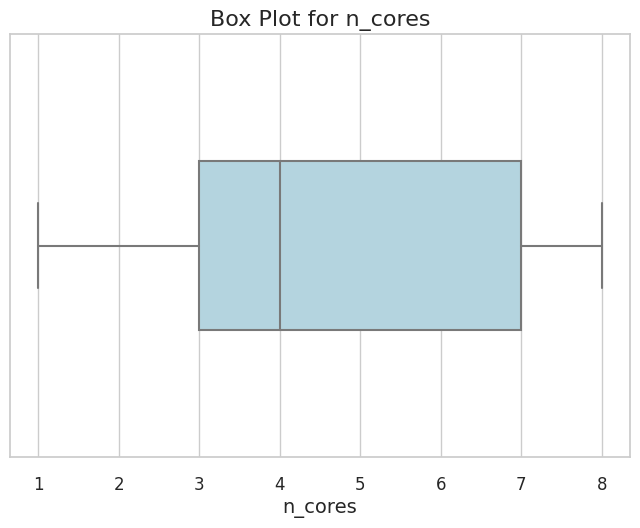

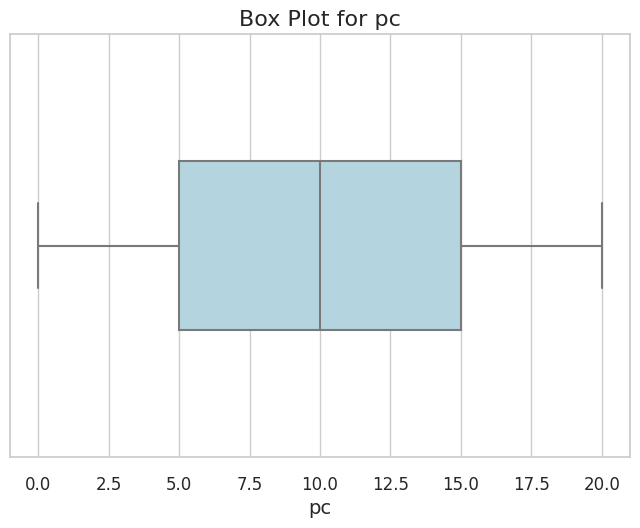

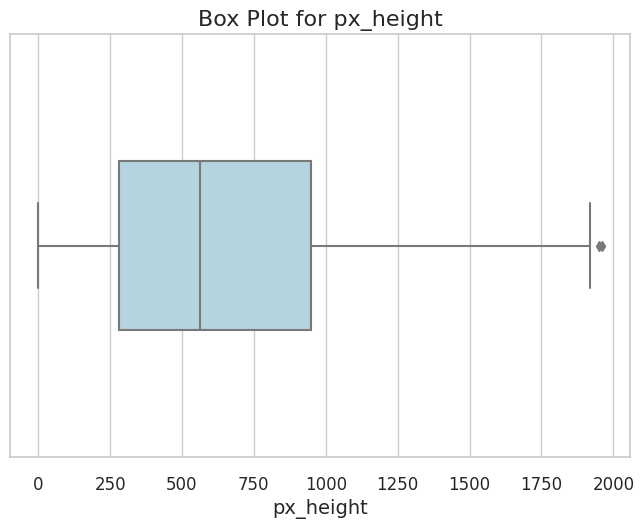

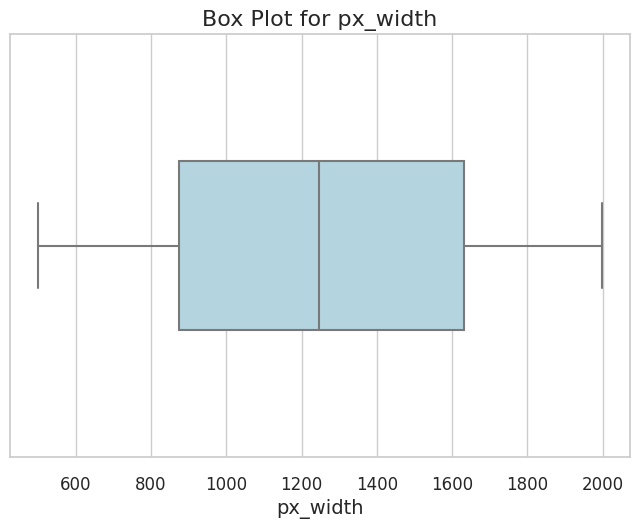

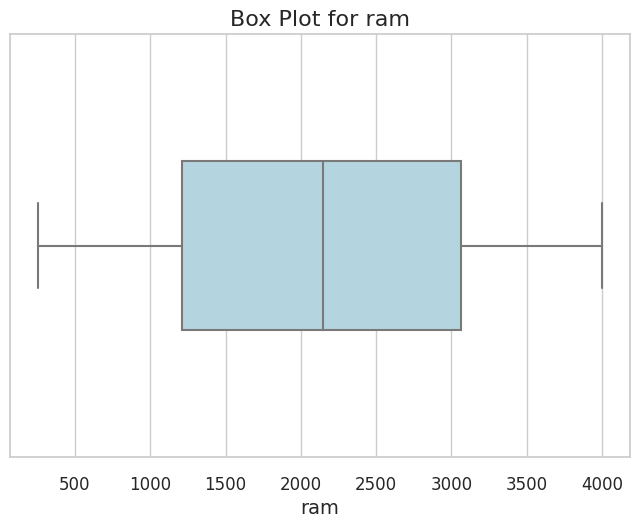

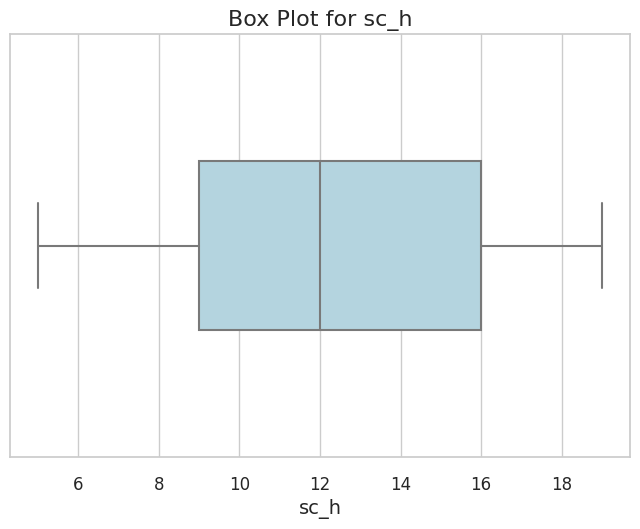

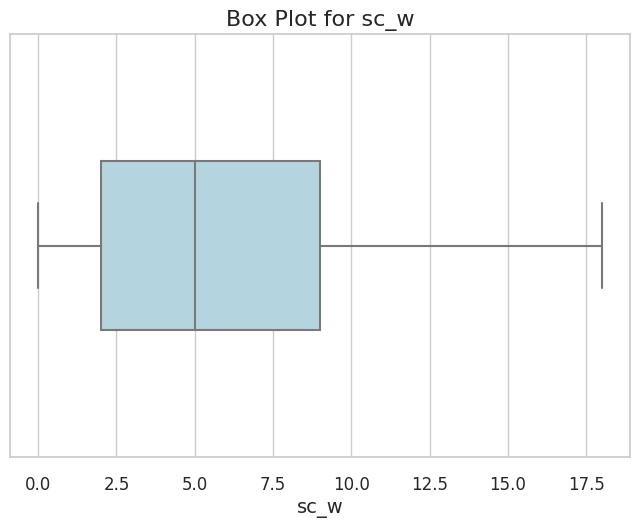

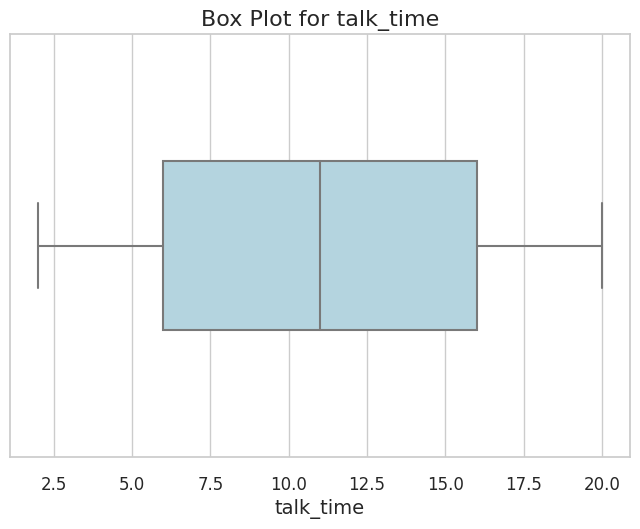

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a custom style and size
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for i in data_num.columns:
    # Create a boxplot for each column
    sns.boxplot(x=data_num[i], color='lightblue', width=0.4)

    # Set a title for each boxplot
    plt.title(f"Box Plot for {i}", fontsize=16)

    # Customize axis labels
    plt.xlabel(i, fontsize=14)

    # Customize tick label font size
    plt.xticks(fontsize=12)

    # Show the plot
    plt.show()

    # Add some space between the plots
    if i != data_num.columns[-1]:
        print('\n')


In [ ]:
def outlinefree(dataCol):

    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange

    colname = dataCol.tolist()               # convert column into list
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):

        if colname[i] > UpperRange:          # list number > Upperrange
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list



    return newlist

In [ ]:
for i in range(len(data_num.columns)):
    new_list =  outlinefree(data.loc[:,data_num.columns[i]]) # retrun new list
    data.loc[:,data_num.columns[i]] = new_list               # new list = data.columns

<ipython-input-29-f8aaab62d9c2>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,data_num.columns[i]] = new_list               # new list = data.columns


In [ ]:
data_final_num = data[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

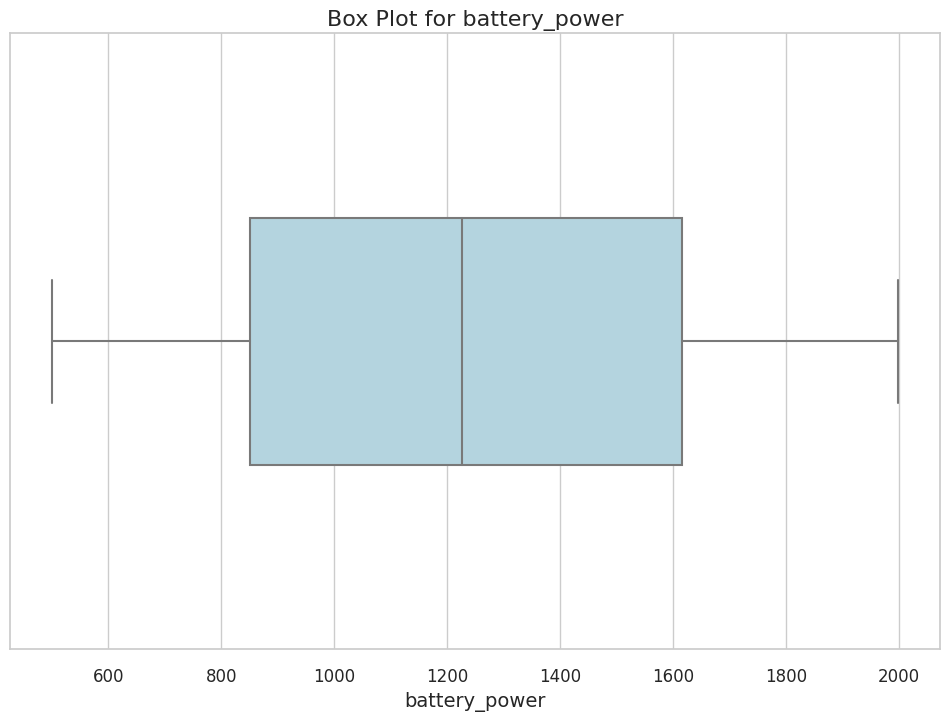

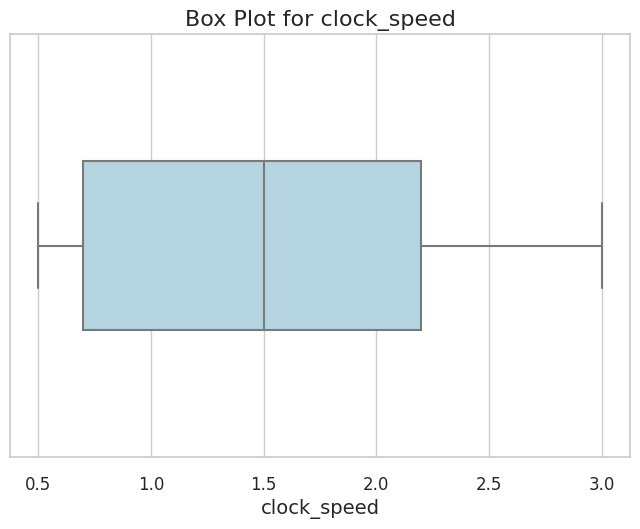

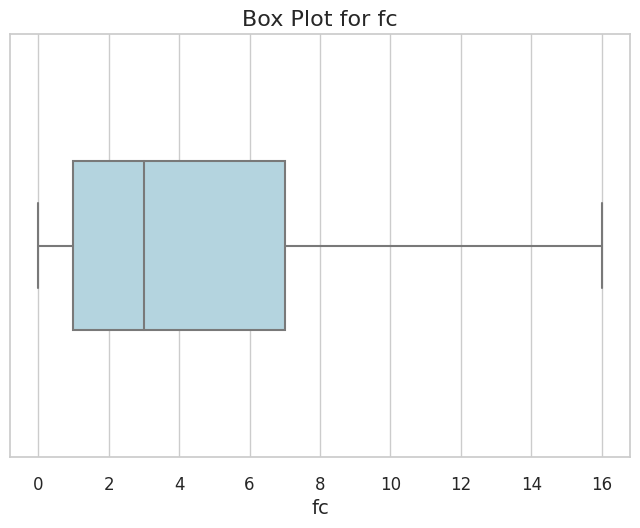

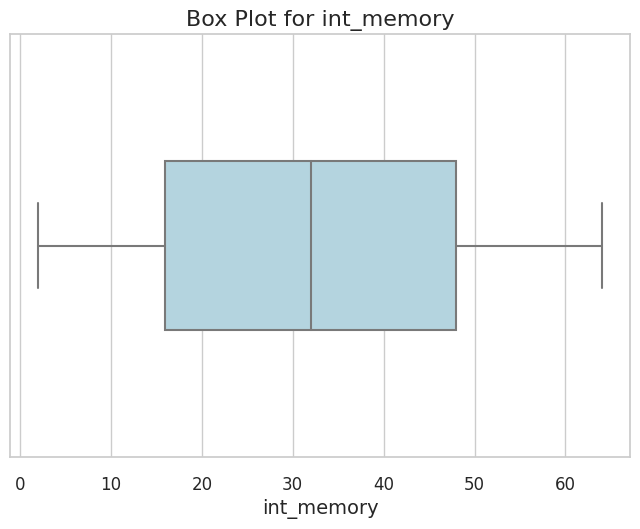

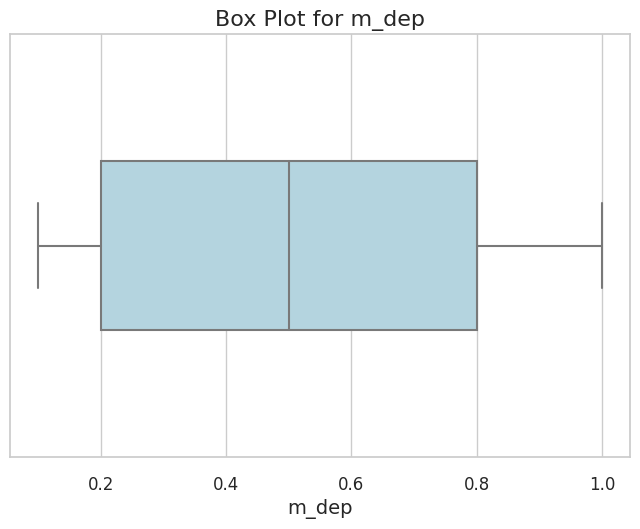

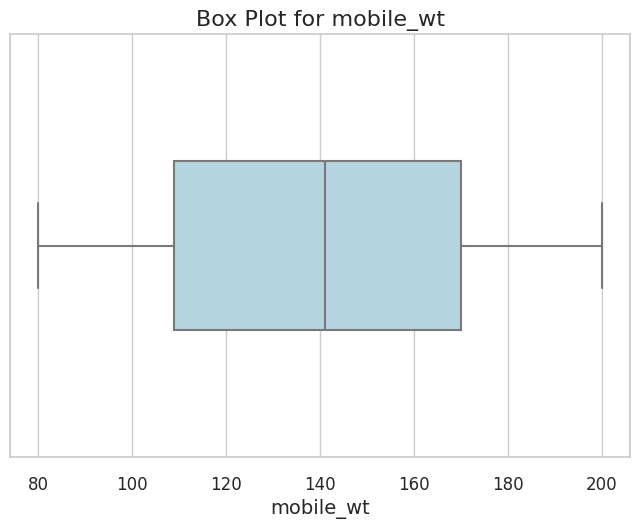

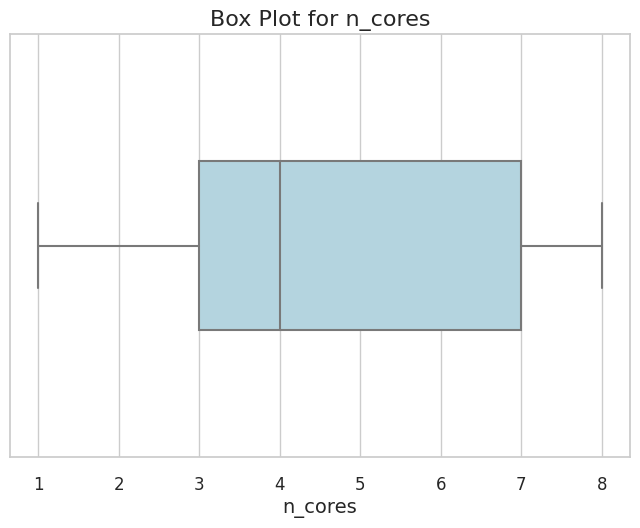

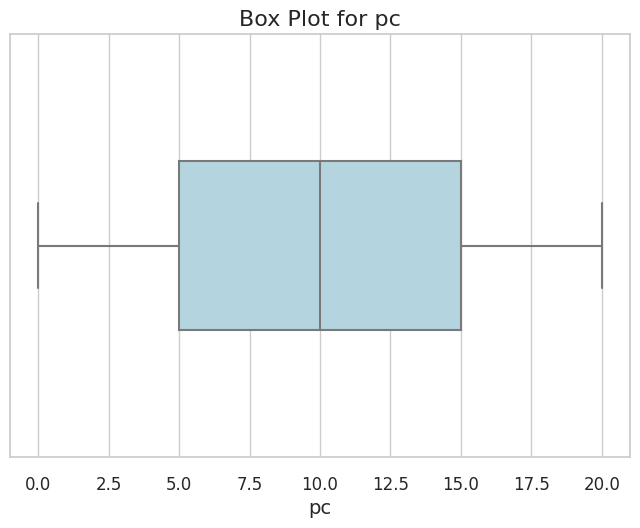

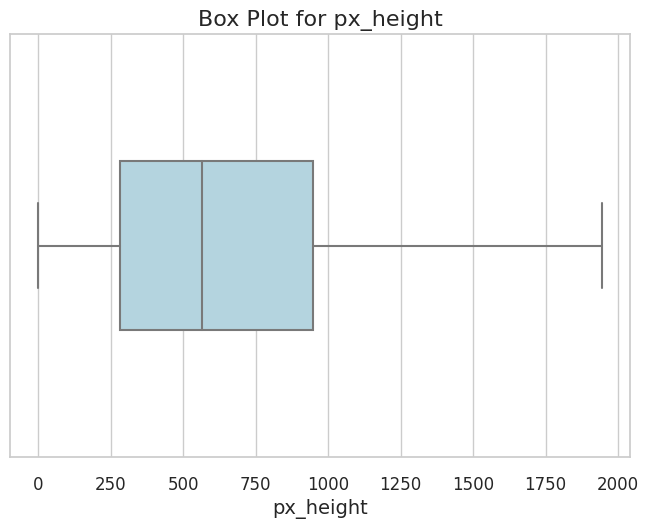

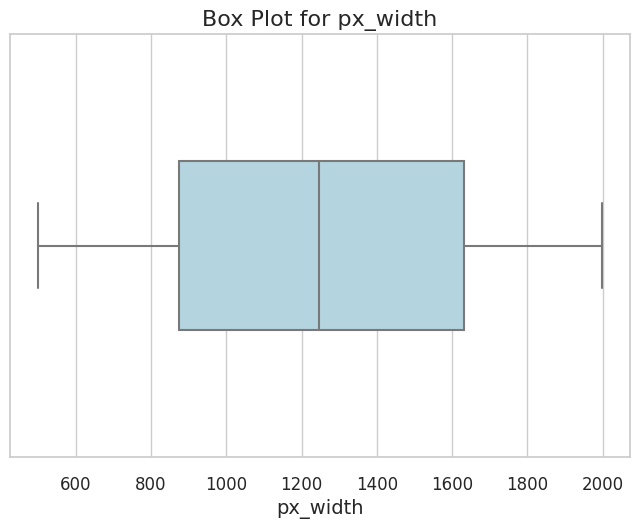

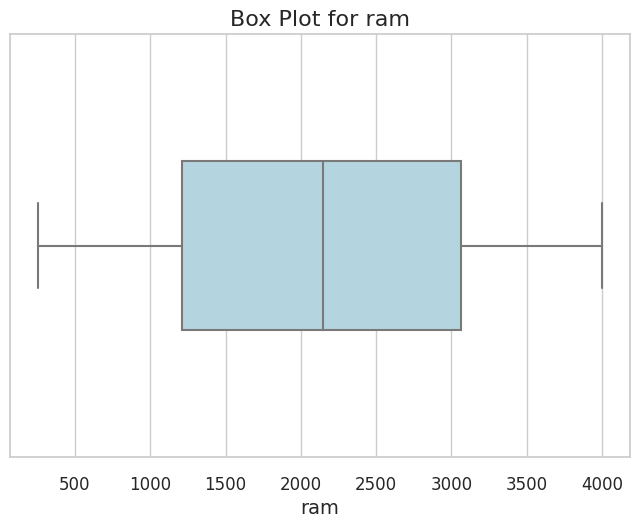

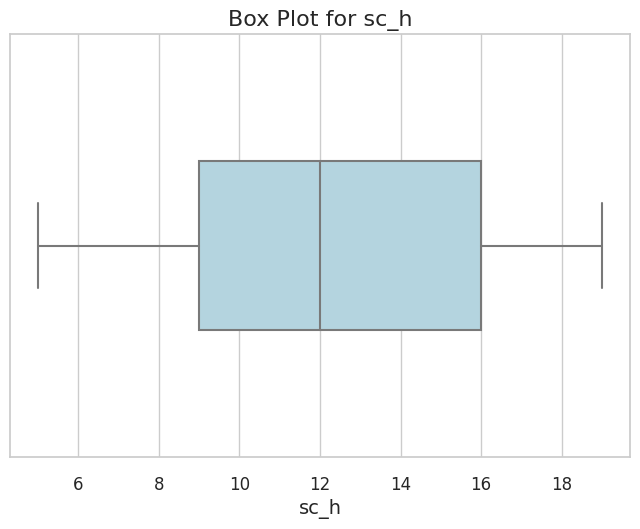

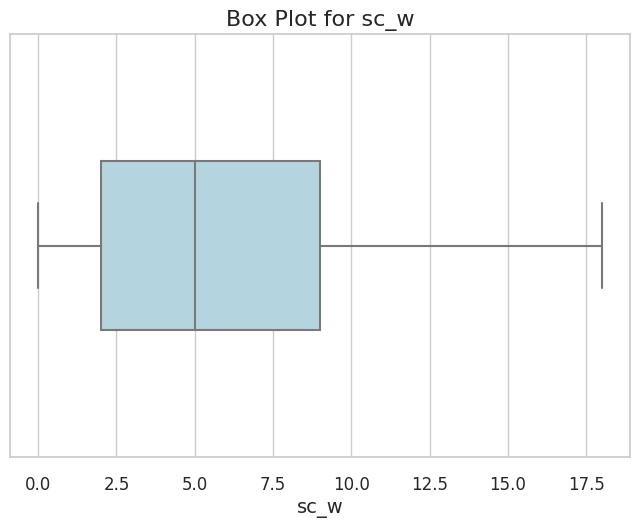

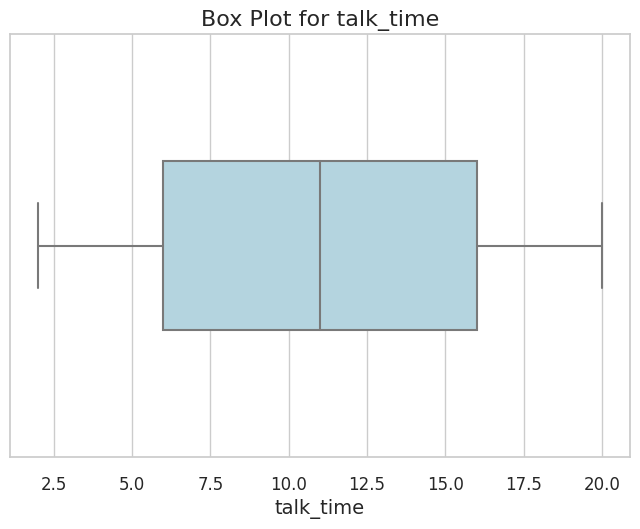

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a custom style and size
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for i in data_final_num.columns:
    # Create a boxplot for each column
    sns.boxplot(x=data_final_num[i], color='lightblue', width=0.4)

    # Set a title for each boxplot
    plt.title(f"Box Plot for {i}", fontsize=16)

    # Customize axis labels
    plt.xlabel(i, fontsize=14)

    # Customize tick label font size
    plt.xticks(fontsize=12)

    # Show the plot
    plt.show()

    # Add some space between the plots
    if i != data_final_num.columns[-1]:
        print('\n')


In [ ]:
final_data = pd.concat([data_final_num, data_cat, data['price_range']], axis=1, join='inner')

In [ ]:
final_data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,842,2.2,1.0,7,0.6,188,2,2,20.0,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0.0,53,0.7,136,3,6,905.0,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2.0,41,0.9,145,5,6,1263.0,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0.0,10,0.8,131,6,9,1216.0,1786,...,16,8,11,1,0,0,1,0,0,2
4,1821,1.2,13.0,44,0.6,141,2,14,1208.0,1212,...,8,2,15,1,0,1,1,1,0,1
